# 1. Setup and Data loading

In [1]:
# %cd D:\Project\Assignment-Arya

d:\Project\Assignment-Arya


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

random_seed = 18

In [3]:
df = pd.read_csv('./dataset/training_set.csv')

# removing unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
# Input features
X = df.drop(["Y"],axis=1)
# Target 
y = df.Y

# 2. Exploratory Data Analysis

## 2.1 Basic Analysis

In [5]:
# checking how many rows are total zeros if drop following columns
drop_columnss = ['X57', 'X56', 'X55','X54']
dd = X.drop(drop_columnss,axis=1)
dd[(dd==0).all(axis=1)].shape

(94, 53)

- All values are numerical.
- All columns are decimal value except X56, X57 and Y columns which are integer value.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

- Values of X55, X56, and X57 have very big range compare to all other features (which usually in range of 0 to 42). We can normalize dataset.
- Features are mostly left skewed, If you observe mean and median value.

In [7]:
# describe method with median parameter attached to it
pd.concat([
        df.describe(), 
        pd.DataFrame(df.median(), columns=['median']).T
    ])

# df_describe.append(df.reindex(df_describe.columns, axis=1).agg(['median']))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000
median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000


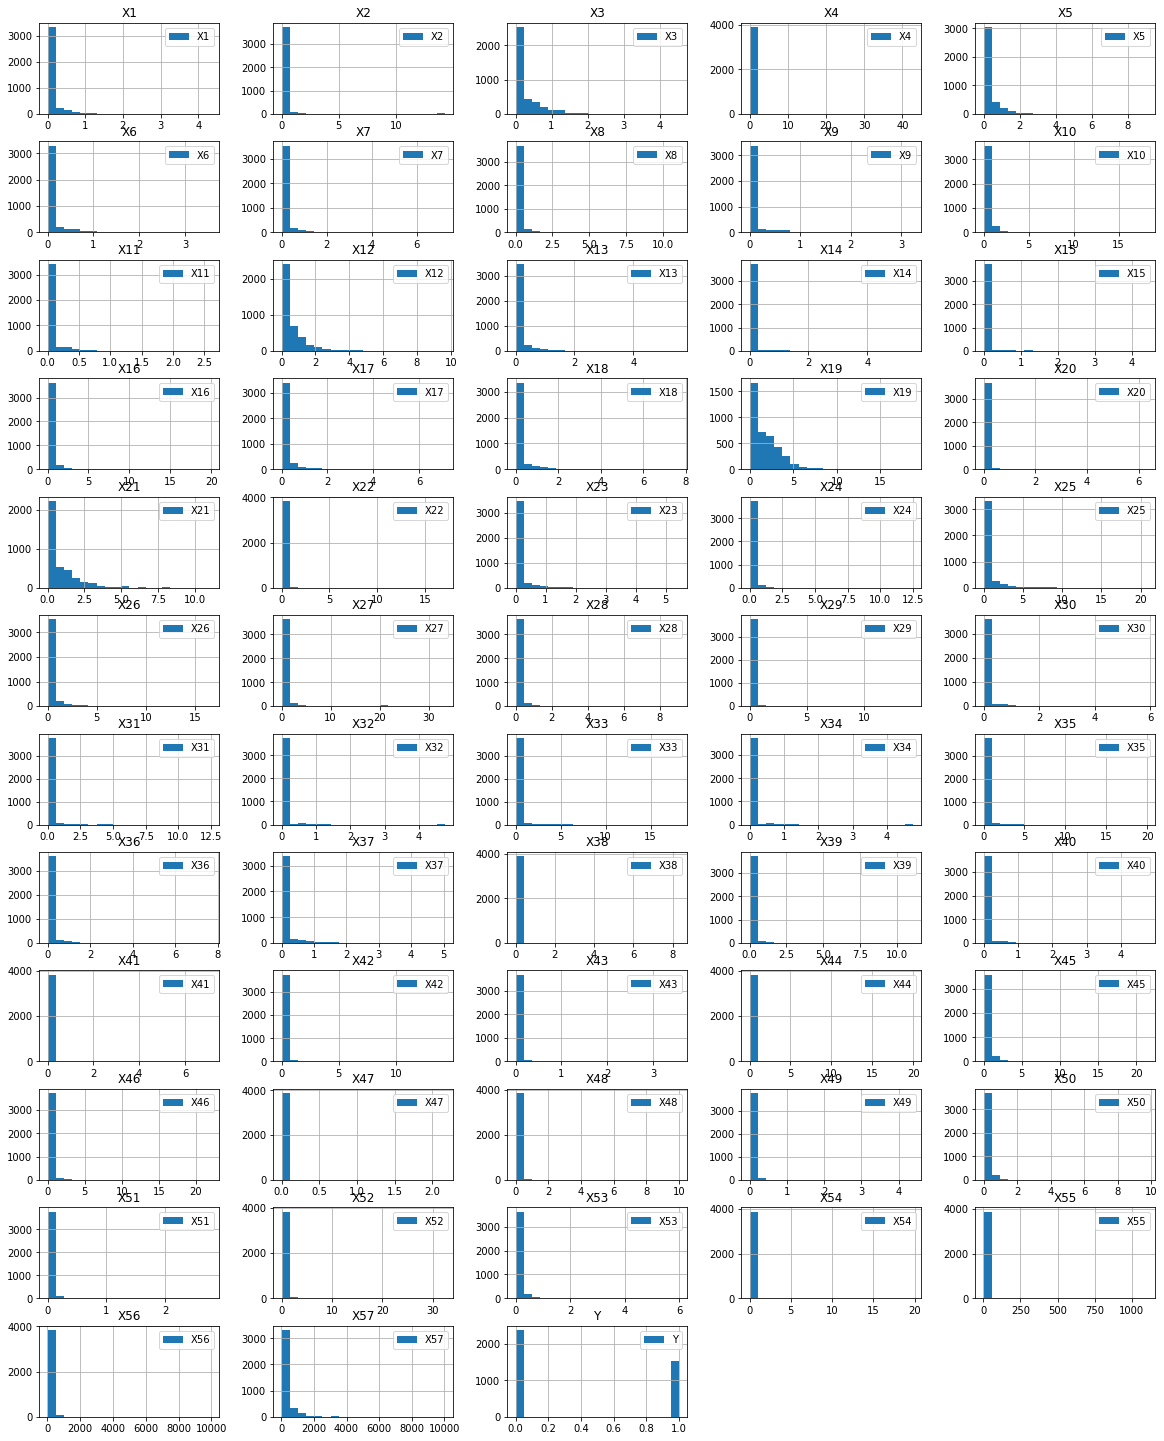

In [8]:
df.hist(figsize=(20,30), bins=20, layout=(14,5), legend=True)
plt.show()

In [9]:
# bar plots
# import matplotlib.pyplot as plt
# import seaborn as sns
# dims = (20, 3)
 
# f, axes = plt.subplots(dims[0], dims[1], figsize=(20, 120))
# axis_i, axis_j = 0, 0
# for col in df.columns:
#   sns.boxplot(x=df.Y, y=df[col], ax=axes[axis_i, axis_j])
#   axis_j += 1
#   if axis_j == dims[1]:
#     axis_i += 1
#     axis_j = 0

There is no null, NaN values persent in dataset

In [10]:
# check if any null/NAN values in data
df.isna().sum().sum()

0

## 2.2 Zero Inflated Dataset

Almost 77% of data in dataset is Zero which is huge problem.

In [11]:
zero_count = (X == 0).sum().sum()
print(f"Total number of zeros in all features: {zero_count}")
zero_percent = (zero_count/X.size)*100
print(f"Percentage of zeros in all features: {zero_percent:.2f} %")

Total number of zeros in all features: 172375
Percentage of zeros in all features: 77.34 %


## 2.3 Check for Imbalanced Dataset

In [12]:
target_freq = df.Y.value_counts().reset_index()
target_freq

,index,Y
0,0,2376
1,1,1534


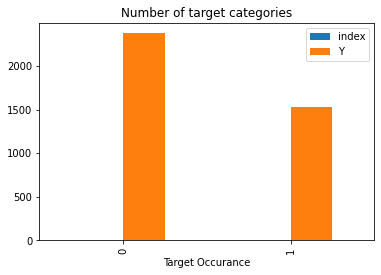

In [13]:
target_freq.plot(kind='bar')
plt.xlabel('Target Value')
plt.xlabel('Target Occurance')
plt.title("Number of target categories")
plt.show()

In [14]:
# Check percentage of output class
df.Y.value_counts(normalize=True)*100

0    60.767263
1    39.232737
Name: Y, dtype: float64

- It's kind of imbalanced datset. Around 61% data belong to "0" class and 39% data to "1" class.

## 2.4. Corrleation with target variable

In [15]:
# df.corr().Y
corr_matrix = pd.DataFrame(abs(df.corrwith(df['Y'])), columns=['Y']).sort_values('Y', ascending=False)
corr_matrix.style.background_gradient(cmap='coolwarm')

,Y
Y,1.000000
X21,0.393099
X23,0.338913
X7,0.327233
X53,0.317384
X19,0.283936
X57,0.270421
X17,0.269190
X16,0.264826
X25,0.254344


# 3. Preprocessing

There is no need for normalization since we using XGboost which decision tree based algorithm.

## 3.1. Handle Imbalanced dataset using SMOTE

In [16]:
from sklearn.model_selection import train_test_split

# train to validation ratio should be 4:1. (Given in assignment document)
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_seed)

In [17]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3128, 57), (3128,), (782, 57), (782,))

In [18]:
from imblearn.over_sampling import SMOTE
# smote = SMOTE()
smote = SMOTE(sampling_strategy='minority')
# smote = SMOTE(sampling_strategy=strategy)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [19]:
X_train_sm.shape, y_train_sm.shape

((3802, 57), (3802,))

In [20]:
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: Y, dtype: float64

# 4. Modeling

## 4.1. Experiment tracking Setup

In [21]:
# ML Flow Installation and import
# !pip install mlflow --quiet
import mlflow
from getpass import getpass

# Set environment variables
os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token or password: ')

# Set remote tracking server
mlflow.set_tracking_uri('https://dagshub.com/Ztrimus/binary-classification-assignment.mlflow')

# set to your server URI
remote_server_uri = "http://127.0.0.1:5000"

exp_name = "xgboost-1st"
mlflow.set_experiment(exp_name)

<Experiment: artifact_location='./artifacts/0', experiment_id='0', lifecycle_stage='active', name='xgboost-1st', tags={}>

## 4.2 Training And Hyperparameter Tuning

In [22]:
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll import scope
from math import exp
import mlflow.xgboost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from mlflow.models.signature import infer_signature

In [23]:
search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
  'learning_rate': hp.loguniform('learning_rate', -3, 0),
  'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
  'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
  'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
  'objective': 'binary:logistic',
  'seed': random_seed, # Set a seed for deterministic training
}

In [24]:
def train_model(params):
  # With MLflow autologging, hyperparameters and the trained model are automatically logged to MLflow.
  mlflow.xgboost.autolog()
  with mlflow.start_run(nested=True):
    train = xgb.DMatrix(data=X_train_sm, label=y_train_sm)
    validation = xgb.DMatrix(data=X_val, label=y_val)
    # Pass in the validation set so xgb can track an evaluation metric. XGBoost terminates training when the evaluation metric is no longer improving.
    booster = xgb.train(
        params=params, dtrain=train, num_boost_round=1000,
        evals=[(validation, "validation")], early_stopping_rounds=50)
    
    model = xgb.XGBClassifier(n_estimators=1000)
    model.fit(X_train, y_train, 
              eval_set=[(X_train, y_train), (X_val, y_val)], 
              early_stopping_rounds=50)

    validation_predictions = model.predict(X_val, ntree_limit=model.best_ntree_limit)
    # AUC ROC
    auc_score = roc_auc_score(y_val, validation_predictions)
    mlflow.log_metric('roc_auc', auc_score)
    # F1-score
    f1 = f1_score(y_val, validation_predictions)
    mlflow.log_metric('f1_score', f1)
    # confusion Matrix
    cm = confusion_matrix(y_val, validation_predictions)
    tn, fp, fn, tp = cm.ravel()
    mlflow.log_metric('true_positive', tp)
    mlflow.log_metric('true_negative', tn)
    mlflow.log_metric('false_positive', fp)
    mlflow.log_metric('false_negative', fn)
    # mlflow.log_artifact(sns.heatmap(cm,annot=True, cmap='Blues', fmt='d'), "confusion_matrix")
    # feature importance
    # feature_importance = booster.get_score()
    # mlflow.log_params('feature_importances', feature_importance)
    # feature_importance = pd.DataFrame([feature_importance]).T
    # feature_importance.columns = ['importance']
    # mlflow.log_artifact(
    #   feature_importance
    #     .sort_values('importance', ascending=True)
    #     .plot(kind='barh', figsize=(20,25)),
    #   "feature_importance")
    

    signature = infer_signature(X_train_sm, model.predict(X_train, ntree_limit=model.best_ntree_limit))
    mlflow.xgboost.log_model(model, "model", signature=signature)
    # model.save_model("model.json")
    
    # Set the loss to -1*auc_score so fmin maximizes the auc_score
    return {'status': STATUS_OK, 'loss': -1*auc_score, 'booster': booster.attributes()}

In [25]:
# Run fmin within an MLflow run context so that each hyperparameter configuration is logged as a child run of a parent
# run called "xgboost_models" .
with mlflow.start_run(run_name='xgboost_models'):
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=99,
  )

  0%|          | 0/99 [00:00<?, ?trial/s, best loss=?]

2022/05/02 03:00:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.36959                        
[1]	validation-logloss:0.29105                        
[2]	validation-logloss:0.23749                        
[3]	validation-logloss:0.20629                        
[4]	validation-logloss:0.19179                        
[5]	validation-logloss:0.18592                        
[6]	validation-logloss:0.17375                        
[7]	validation-logloss:0.17140                        
[8]	validation-logloss:0.17575                        
[9]	validation-logloss:0.17127                        
[10]	validation-logloss:0.17038                       
[11]	validation-logloss:0.16312                       
[12]	validation-logloss:0.16256                       
[13]	validation-logloss:0.15998                       
[14]	validation-logloss:0.15893                       
[15]	validation-logloss:0.15799                       
[16]	validation-logloss:0.16456                       
[17]	validation-logloss:0.16190                       
[18]	valid

2022/05/02 03:01:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is depreca

[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274
[13]	validation_0-logloss:0.09779	validation_1-logloss:0.15791
[14]	validation_0-logloss:0.09348	validation_1-logloss:0.15470
[15]	validation_0-logloss:0.09042	validation_1-logloss:0.15294
[1

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing 

  1%|          | 1/99 [00:50<1:21:55, 50.16s/trial, best loss: -0.9462746442653867]

2022/05/02 03:01:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.58487                                                     
[1]	validation-logloss:0.50517                                                     
[2]	validation-logloss:0.44567                                                     
[3]	validation-logloss:0.39504                                                     
[4]	validation-logloss:0.35825                                                     
[5]	validation-logloss:0.32780                                                     
[6]	validation-logloss:0.30237                                                     
[7]	validation-logloss:0.28169                                                     
[8]	validation-logloss:0.26226                                                     
[9]	validation-logloss:0.24980                                                     
[10]	validation-logloss:0.23216                                                    
[11]	validation-logloss:0.22134                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  2%|▏         | 2/99 [01:34<1:15:57, 46.99s/trial, best loss: -0.9462746442653867]

2022/05/02 03:02:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.60153                                                     
[1]	validation-logloss:0.53194                                                     
[2]	validation-logloss:0.47712                                                     
[3]	validation-logloss:0.43245                                                     
[4]	validation-logloss:0.39584                                                     
[5]	validation-logloss:0.36628                                                     
[6]	validation-logloss:0.33946                                                     
[7]	validation-logloss:0.31823                                                     
[8]	validation-logloss:0.30102                                                     
[9]	validation-logloss:0.28307                                                     
[10]	validation-logloss:0.26709                                                    
[11]	validation-logloss:0.25621                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  3%|▎         | 3/99 [02:23<1:16:00, 47.51s/trial, best loss: -0.9462746442653867]

2022/05/02 03:03:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.64069                                                     
[1]	validation-logloss:0.59523                                                     
[2]	validation-logloss:0.55664                                                     
[3]	validation-logloss:0.52227                                                     
[4]	validation-logloss:0.49199                                                     
[5]	validation-logloss:0.46402                                                     
[6]	validation-logloss:0.44000                                                     
[7]	validation-logloss:0.41778                                                     
[8]	validation-logloss:0.39941                                                     
[9]	validation-logloss:0.38177                                                     
[10]	validation-logloss:0.36600                                                    
[11]	validation-logloss:0.35006                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  4%|▍         | 4/99 [03:10<1:14:53, 47.30s/trial, best loss: -0.9462746442653867]

2022/05/02 03:04:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.59351                                                     
[1]	validation-logloss:0.52004                                                     
[2]	validation-logloss:0.46395                                                     
[3]	validation-logloss:0.41839                                                     
[4]	validation-logloss:0.38064                                                     
[5]	validation-logloss:0.34937                                                     
[6]	validation-logloss:0.32418                                                     
[7]	validation-logloss:0.30531                                                     
[8]	validation-logloss:0.28631                                                     
[9]	validation-logloss:0.27273                                                     
[10]	validation-logloss:0.25680                                                    
[11]	validation-logloss:0.24557                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  5%|▌         | 5/99 [03:57<1:14:20, 47.45s/trial, best loss: -0.9462746442653867]

2022/05/02 03:04:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.59715                                                     
[1]	validation-logloss:0.52473                                                     
[2]	validation-logloss:0.46677                                                     
[3]	validation-logloss:0.42257                                                     
[4]	validation-logloss:0.38592                                                     
[5]	validation-logloss:0.35647                                                     
[6]	validation-logloss:0.33216                                                     
[7]	validation-logloss:0.31102                                                     
[8]	validation-logloss:0.29392                                                     
[9]	validation-logloss:0.27613                                                     
[10]	validation-logloss:0.25785                                                    
[11]	validation-logloss:0.24312                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  6%|▌         | 6/99 [04:50<1:16:05, 49.09s/trial, best loss: -0.9462746442653867]

2022/05/02 03:05:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.63213                                                     
[1]	validation-logloss:0.58178                                                     
[2]	validation-logloss:0.53905                                                     
[3]	validation-logloss:0.50238                                                     
[4]	validation-logloss:0.47022                                                     
[5]	validation-logloss:0.44192                                                     
[6]	validation-logloss:0.41730                                                     
[7]	validation-logloss:0.39535                                                     
[8]	validation-logloss:0.37718                                                     
[9]	validation-logloss:0.36001                                                     
[10]	validation-logloss:0.34439                                                    
[11]	validation-logloss:0.33093                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  7%|▋         | 7/99 [05:37<1:14:18, 48.47s/trial, best loss: -0.9462746442653867]

2022/05/02 03:06:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.61835                                                     
[1]	validation-logloss:0.55797                                                     
[2]	validation-logloss:0.50907                                                     
[3]	validation-logloss:0.46626                                                     
[4]	validation-logloss:0.43086                                                     
[5]	validation-logloss:0.40037                                                     
[6]	validation-logloss:0.37450                                                     
[7]	validation-logloss:0.35060                                                     
[8]	validation-logloss:0.32914                                                     
[9]	validation-logloss:0.31090                                                     
[10]	validation-logloss:0.29547                                                    
[11]	validation-logloss:0.28164                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  8%|▊         | 8/99 [06:22<1:12:11, 47.60s/trial, best loss: -0.9462746442653867]

2022/05/02 03:07:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.38703                                                     
[1]	validation-logloss:0.28770                                                     
[2]	validation-logloss:0.21907                                                     
[3]	validation-logloss:0.18900                                                     
[4]	validation-logloss:0.17267                                                     
[5]	validation-logloss:0.15983                                                     
[6]	validation-logloss:0.15670                                                     
[7]	validation-logloss:0.15654                                                     
[8]	validation-logloss:0.15404                                                     
[9]	validation-logloss:0.15162                                                     
[10]	validation-logloss:0.15494                                                    
[11]	validation-logloss:0.15658                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



  9%|▉         | 9/99 [07:04<1:08:36, 45.74s/trial, best loss: -0.9462746442653867]

2022/05/02 03:08:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.40395                                                     
[1]	validation-logloss:0.30260                                                     
[2]	validation-logloss:0.25480                                                     
[3]	validation-logloss:0.20699                                                     
[4]	validation-logloss:0.19041                                                     
[5]	validation-logloss:0.17987                                                     
[6]	validation-logloss:0.16485                                                     
[7]	validation-logloss:0.16446                                                     
[8]	validation-logloss:0.16117                                                     
[9]	validation-logloss:0.15891                                                     
[10]	validation-logloss:0.15541                                                    
[11]	validation-logloss:0.15216                                             

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                      
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                      
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                      
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                      
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                      
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                      
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                      
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                      
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                      
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                      
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                     
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662              

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 10%|█         | 10/99 [07:46<1:06:08, 44.59s/trial, best loss: -0.9462746442653867]

2022/05/02 03:08:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.61925                                                      
[1]	validation-logloss:0.55872                                                      
[2]	validation-logloss:0.50942                                                      
[3]	validation-logloss:0.46655                                                      
[4]	validation-logloss:0.43206                                                      
[5]	validation-logloss:0.40250                                                      
[6]	validation-logloss:0.37565                                                      
[7]	validation-logloss:0.35266                                                      
[8]	validation-logloss:0.33183                                                      
[9]	validation-logloss:0.31355                                                      
[10]	validation-logloss:0.29632                                                     
[11]	validation-logloss:0.28124                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 11%|█         | 11/99 [08:33<1:06:37, 45.42s/trial, best loss: -0.9462746442653867]

2022/05/02 03:09:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.60201                                                      
[1]	validation-logloss:0.53102                                                      
[2]	validation-logloss:0.47764                                                      
[3]	validation-logloss:0.43335                                                      
[4]	validation-logloss:0.39549                                                      
[5]	validation-logloss:0.36483                                                      
[6]	validation-logloss:0.34056                                                      
[7]	validation-logloss:0.31888                                                      
[8]	validation-logloss:0.30009                                                      
[9]	validation-logloss:0.28505                                                      
[10]	validation-logloss:0.27308                                                     
[11]	validation-logloss:0.25717                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 12%|█▏        | 12/99 [09:26<1:08:54, 47.52s/trial, best loss: -0.9462746442653867]

2022/05/02 03:10:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.53493                                                      
[1]	validation-logloss:0.43745                                                      
[2]	validation-logloss:0.37162                                                      
[3]	validation-logloss:0.32339                                                      
[4]	validation-logloss:0.29311                                                      
[5]	validation-logloss:0.26322                                                      
[6]	validation-logloss:0.23921                                                      
[7]	validation-logloss:0.21983                                                      
[8]	validation-logloss:0.20610                                                      
[9]	validation-logloss:0.19516                                                      
[10]	validation-logloss:0.18469                                                     
[11]	validation-logloss:0.17550                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 13%|█▎        | 13/99 [10:21<1:11:35, 49.95s/trial, best loss: -0.9462746442653867]

2022/05/02 03:11:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.55449                                                      
[1]	validation-logloss:0.46652                                                      
[2]	validation-logloss:0.40268                                                      
[3]	validation-logloss:0.35554                                                      
[4]	validation-logloss:0.32127                                                      
[5]	validation-logloss:0.29640                                                      
[6]	validation-logloss:0.27198                                                      
[7]	validation-logloss:0.25317                                                      
[8]	validation-logloss:0.23182                                                      
[9]	validation-logloss:0.21820                                                      
[10]	validation-logloss:0.20683                                                     
[11]	validation-logloss:0.19454                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 14%|█▍        | 14/99 [11:15<1:12:28, 51.15s/trial, best loss: -0.9462746442653867]

2022/05/02 03:12:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.63473                                                      
[1]	validation-logloss:0.58442                                                      
[2]	validation-logloss:0.54163                                                      
[3]	validation-logloss:0.50504                                                      
[4]	validation-logloss:0.47394                                                      
[5]	validation-logloss:0.44573                                                      
[6]	validation-logloss:0.42080                                                      
[7]	validation-logloss:0.39911                                                      
[8]	validation-logloss:0.37852                                                      
[9]	validation-logloss:0.36065                                                      
[10]	validation-logloss:0.34454                                                     
[11]	validation-logloss:0.33102                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 15%|█▌        | 15/99 [12:05<1:11:13, 50.87s/trial, best loss: -0.9462746442653867]

2022/05/02 03:13:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.30951                                                      
[1]	validation-logloss:0.25861                                                      
[2]	validation-logloss:0.22585                                                      
[3]	validation-logloss:0.20587                                                      
[4]	validation-logloss:0.21148                                                      
[5]	validation-logloss:0.20736                                                      
[6]	validation-logloss:0.20662                                                      
[7]	validation-logloss:0.20634                                                      
[8]	validation-logloss:0.20654                                                      
[9]	validation-logloss:0.20639                                                      
[10]	validation-logloss:0.20060                                                     
[11]	validation-logloss:0.19956                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 16%|█▌        | 16/99 [12:55<1:09:50, 50.48s/trial, best loss: -0.9462746442653867]

2022/05/02 03:13:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.62305                                                      
[1]	validation-logloss:0.56646                                                      
[2]	validation-logloss:0.51894                                                      
[3]	validation-logloss:0.47900                                                      
[4]	validation-logloss:0.44656                                                      
[5]	validation-logloss:0.41742                                                      
[6]	validation-logloss:0.38986                                                      
[7]	validation-logloss:0.36688                                                      
[8]	validation-logloss:0.34780                                                      
[9]	validation-logloss:0.33089                                                      
[10]	validation-logloss:0.31555                                                     
[11]	validation-logloss:0.30415                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 17%|█▋        | 17/99 [13:45<1:08:46, 50.33s/trial, best loss: -0.9462746442653867]

2022/05/02 03:14:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.62868                                                      
[1]	validation-logloss:0.57588                                                      
[2]	validation-logloss:0.53166                                                      
[3]	validation-logloss:0.49187                                                      
[4]	validation-logloss:0.45740                                                      
[5]	validation-logloss:0.42647                                                      
[6]	validation-logloss:0.40061                                                      
[7]	validation-logloss:0.37646                                                      
[8]	validation-logloss:0.35574                                                      
[9]	validation-logloss:0.33736                                                      
[10]	validation-logloss:0.32061                                                     
[11]	validation-logloss:0.30574                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 18%|█▊        | 18/99 [14:37<1:08:36, 50.82s/trial, best loss: -0.9462746442653867]

2022/05/02 03:15:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.33577                                                      
[1]	validation-logloss:0.24489                                                      
[2]	validation-logloss:0.21978                                                      
[3]	validation-logloss:0.19165                                                      
[4]	validation-logloss:0.17957                                                      
[5]	validation-logloss:0.16745                                                      
[6]	validation-logloss:0.16402                                                      
[7]	validation-logloss:0.16097                                                      
[8]	validation-logloss:0.16342                                                      
[9]	validation-logloss:0.16199                                                      
[10]	validation-logloss:0.15991                                                     
[11]	validation-logloss:0.16007                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 19%|█▉        | 19/99 [15:21<1:05:11, 48.89s/trial, best loss: -0.9462746442653867]

2022/05/02 03:16:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47478                                                      
[1]	validation-logloss:0.37102                                                      
[2]	validation-logloss:0.30977                                                      
[3]	validation-logloss:0.27009                                                      
[4]	validation-logloss:0.24033                                                      
[5]	validation-logloss:0.22275                                                      
[6]	validation-logloss:0.20175                                                      
[7]	validation-logloss:0.18727                                                      
[8]	validation-logloss:0.17903                                                      
[9]	validation-logloss:0.17301                                                      
[10]	validation-logloss:0.16901                                                     
[11]	validation-logloss:0.16798                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 20%|██        | 20/99 [16:08<1:03:21, 48.13s/trial, best loss: -0.9462746442653867]

2022/05/02 03:17:05 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.65564                                                      
[1]	validation-logloss:0.62260                                                      
[2]	validation-logloss:0.59216                                                      
[3]	validation-logloss:0.56471                                                      
[4]	validation-logloss:0.54035                                                      
[5]	validation-logloss:0.51666                                                      
[6]	validation-logloss:0.49464                                                      
[7]	validation-logloss:0.47493                                                      
[8]	validation-logloss:0.45721                                                      
[9]	validation-logloss:0.44081                                                      
[10]	validation-logloss:0.42532                                                     
[11]	validation-logloss:0.40967                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 21%|██        | 21/99 [16:57<1:03:03, 48.51s/trial, best loss: -0.9462746442653867]

2022/05/02 03:17:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.31810                                                      
[1]	validation-logloss:0.24259                                                      
[2]	validation-logloss:0.21769                                                      
[3]	validation-logloss:0.20045                                                      
[4]	validation-logloss:0.19629                                                      
[5]	validation-logloss:0.20110                                                      
[6]	validation-logloss:0.20074                                                      
[7]	validation-logloss:0.19982                                                      
[8]	validation-logloss:0.20319                                                      
[9]	validation-logloss:0.19959                                                      
[10]	validation-logloss:0.19773                                                     
[11]	validation-logloss:0.20049                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 22%|██▏       | 22/99 [17:46<1:02:15, 48.51s/trial, best loss: -0.9462746442653867]

2022/05/02 03:18:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47923                                                      
[1]	validation-logloss:0.37389                                                      
[2]	validation-logloss:0.31227                                                      
[3]	validation-logloss:0.27465                                                      
[4]	validation-logloss:0.24173                                                      
[5]	validation-logloss:0.22119                                                      
[6]	validation-logloss:0.20033                                                      
[7]	validation-logloss:0.18914                                                      
[8]	validation-logloss:0.17997                                                      
[9]	validation-logloss:0.17412                                                      
[10]	validation-logloss:0.17198                                                     
[11]	validation-logloss:0.16824                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 23%|██▎       | 23/99 [18:31<1:00:07, 47.47s/trial, best loss: -0.9462746442653867]

2022/05/02 03:19:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.64947                                                      
[1]	validation-logloss:0.61116                                                      
[2]	validation-logloss:0.57781                                                      
[3]	validation-logloss:0.54706                                                      
[4]	validation-logloss:0.51842                                                      
[5]	validation-logloss:0.49301                                                      
[6]	validation-logloss:0.47011                                                      
[7]	validation-logloss:0.44932                                                      
[8]	validation-logloss:0.43033                                                      
[9]	validation-logloss:0.41150                                                      
[10]	validation-logloss:0.39376                                                     
[11]	validation-logloss:0.37854                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 24%|██▍       | 24/99 [19:23<1:01:04, 48.86s/trial, best loss: -0.9462746442653867]

2022/05/02 03:20:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.32238                                                      
[1]	validation-logloss:0.26157                                                      
[2]	validation-logloss:0.22331                                                      
[3]	validation-logloss:0.20770                                                      
[4]	validation-logloss:0.19498                                                      
[5]	validation-logloss:0.19769                                                      
[6]	validation-logloss:0.19267                                                      
[7]	validation-logloss:0.18903                                                      
[8]	validation-logloss:0.19249                                                      
[9]	validation-logloss:0.19665                                                      
[10]	validation-logloss:0.19629                                                     
[11]	validation-logloss:0.20013                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 25%|██▌       | 25/99 [20:11<1:00:11, 48.80s/trial, best loss: -0.9462746442653867]

2022/05/02 03:21:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.50038                                                      
[1]	validation-logloss:0.40304                                                      
[2]	validation-logloss:0.34413                                                      
[3]	validation-logloss:0.30411                                                      
[4]	validation-logloss:0.26503                                                      
[5]	validation-logloss:0.23732                                                      
[6]	validation-logloss:0.22325                                                      
[7]	validation-logloss:0.20993                                                      
[8]	validation-logloss:0.20049                                                      
[9]	validation-logloss:0.19207                                                      
[10]	validation-logloss:0.18542                                                     
[11]	validation-logloss:0.18306                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 26%|██▋       | 26/99 [20:56<57:48, 47.52s/trial, best loss: -0.9462746442653867]  

2022/05/02 03:21:53 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.65407                                                    
[1]	validation-logloss:0.61943                                                    
[2]	validation-logloss:0.58840                                                    
[3]	validation-logloss:0.56033                                                    
[4]	validation-logloss:0.53435                                                    
[5]	validation-logloss:0.51110                                                    
[6]	validation-logloss:0.48945                                                    
[7]	validation-logloss:0.46886                                                    
[8]	validation-logloss:0.45034                                                    
[9]	validation-logloss:0.43290                                                    
[10]	validation-logloss:0.41710                                                   
[11]	validation-logloss:0.40205                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 27%|██▋       | 27/99 [21:49<58:56, 49.12s/trial, best loss: -0.9462746442653867]

2022/05/02 03:22:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.36893                                                    
[1]	validation-logloss:0.26461                                                    
[2]	validation-logloss:0.21676                                                    
[3]	validation-logloss:0.18912                                                    
[4]	validation-logloss:0.17724                                                    
[5]	validation-logloss:0.16235                                                    
[6]	validation-logloss:0.15936                                                    
[7]	validation-logloss:0.15285                                                    
[8]	validation-logloss:0.15145                                                    
[9]	validation-logloss:0.15293                                                    
[10]	validation-logloss:0.15397                                                   
[11]	validation-logloss:0.15470                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 28%|██▊       | 28/99 [22:32<56:02, 47.35s/trial, best loss: -0.9462746442653867]

2022/05/02 03:23:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.49838                                                    
[1]	validation-logloss:0.39531                                                    
[2]	validation-logloss:0.32768                                                    
[3]	validation-logloss:0.28153                                                    
[4]	validation-logloss:0.25702                                                    
[5]	validation-logloss:0.24179                                                    
[6]	validation-logloss:0.21466                                                    
[7]	validation-logloss:0.19787                                                    
[8]	validation-logloss:0.18530                                                    
[9]	validation-logloss:0.17388                                                    
[10]	validation-logloss:0.16777                                                   
[11]	validation-logloss:0.16575                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 29%|██▉       | 29/99 [23:20<55:32, 47.61s/trial, best loss: -0.9462746442653867]

2022/05/02 03:24:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.56099                                                    
[1]	validation-logloss:0.47240                                                    
[2]	validation-logloss:0.40786                                                    
[3]	validation-logloss:0.35755                                                    
[4]	validation-logloss:0.32036                                                    
[5]	validation-logloss:0.29344                                                    
[6]	validation-logloss:0.27283                                                    
[7]	validation-logloss:0.24803                                                    
[8]	validation-logloss:0.22979                                                    
[9]	validation-logloss:0.21398                                                    
[10]	validation-logloss:0.20212                                                   
[11]	validation-logloss:0.19338                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 30%|███       | 30/99 [24:03<53:14, 46.30s/trial, best loss: -0.9462746442653867]

2022/05/02 03:25:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.37315                                                    
[1]	validation-logloss:0.27195                                                    
[2]	validation-logloss:0.23080                                                    
[3]	validation-logloss:0.20664                                                    
[4]	validation-logloss:0.18159                                                    
[5]	validation-logloss:0.17186                                                    
[6]	validation-logloss:0.16090                                                    
[7]	validation-logloss:0.15849                                                    
[8]	validation-logloss:0.15416                                                    
[9]	validation-logloss:0.15720                                                    
[10]	validation-logloss:0.15709                                                   
[11]	validation-logloss:0.15363                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 31%|███▏      | 31/99 [24:54<54:01, 47.68s/trial, best loss: -0.9462746442653867]

2022/05/02 03:25:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.52426                                                    
[1]	validation-logloss:0.43064                                                    
[2]	validation-logloss:0.36548                                                    
[3]	validation-logloss:0.32172                                                    
[4]	validation-logloss:0.29105                                                    
[5]	validation-logloss:0.26488                                                    
[6]	validation-logloss:0.24614                                                    
[7]	validation-logloss:0.23315                                                    
[8]	validation-logloss:0.21756                                                    
[9]	validation-logloss:0.20954                                                    
[10]	validation-logloss:0.19758                                                   
[11]	validation-logloss:0.19217                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 32%|███▏      | 32/99 [25:40<52:34, 47.07s/trial, best loss: -0.9462746442653867]

2022/05/02 03:26:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.57057                                                    
[1]	validation-logloss:0.48566                                                    
[2]	validation-logloss:0.42209                                                    
[3]	validation-logloss:0.37560                                                    
[4]	validation-logloss:0.33832                                                    
[5]	validation-logloss:0.30990                                                    
[6]	validation-logloss:0.28234                                                    
[7]	validation-logloss:0.26409                                                    
[8]	validation-logloss:0.24708                                                    
[9]	validation-logloss:0.23481                                                    
[10]	validation-logloss:0.22192                                                   
[11]	validation-logloss:0.21197                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 33%|███▎      | 33/99 [26:27<51:35, 46.90s/trial, best loss: -0.9462746442653867]

2022/05/02 03:27:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.42171                                                    
[1]	validation-logloss:0.31510                                                    
[2]	validation-logloss:0.25592                                                    
[3]	validation-logloss:0.21367                                                    
[4]	validation-logloss:0.19494                                                    
[5]	validation-logloss:0.17911                                                    
[6]	validation-logloss:0.16636                                                    
[7]	validation-logloss:0.15637                                                    
[8]	validation-logloss:0.15300                                                    
[9]	validation-logloss:0.14797                                                    
[10]	validation-logloss:0.14732                                                   
[11]	validation-logloss:0.14778                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 34%|███▍      | 34/99 [27:02<47:13, 43.59s/trial, best loss: -0.9462746442653867]

2022/05/02 03:28:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.52094                                                    
[1]	validation-logloss:0.42391                                                    
[2]	validation-logloss:0.36506                                                    
[3]	validation-logloss:0.31553                                                    
[4]	validation-logloss:0.28032                                                    
[5]	validation-logloss:0.25623                                                    
[6]	validation-logloss:0.23273                                                    
[7]	validation-logloss:0.21507                                                    
[8]	validation-logloss:0.20045                                                    
[9]	validation-logloss:0.19092                                                    
[10]	validation-logloss:0.18275                                                   
[11]	validation-logloss:0.17836                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 35%|███▌      | 35/99 [27:42<45:03, 42.25s/trial, best loss: -0.9462746442653867]

2022/05/02 03:28:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.43270                                                    
[1]	validation-logloss:0.33050                                                    
[2]	validation-logloss:0.27462                                                    
[3]	validation-logloss:0.23925                                                    
[4]	validation-logloss:0.21446                                                    
[5]	validation-logloss:0.20050                                                    
[6]	validation-logloss:0.18901                                                    
[7]	validation-logloss:0.18094                                                    
[8]	validation-logloss:0.17917                                                    
[9]	validation-logloss:0.17901                                                    
[10]	validation-logloss:0.17299                                                   
[11]	validation-logloss:0.17128                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 36%|███▋      | 36/99 [28:17<42:13, 40.22s/trial, best loss: -0.9462746442653867]

2022/05/02 03:29:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.65638                                                    
[1]	validation-logloss:0.62259                                                    
[2]	validation-logloss:0.59175                                                    
[3]	validation-logloss:0.56420                                                    
[4]	validation-logloss:0.53947                                                    
[5]	validation-logloss:0.51596                                                    
[6]	validation-logloss:0.49479                                                    
[7]	validation-logloss:0.47523                                                    
[8]	validation-logloss:0.45660                                                    
[9]	validation-logloss:0.43938                                                    
[10]	validation-logloss:0.42335                                                   
[11]	validation-logloss:0.40872                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 37%|███▋      | 37/99 [28:58<41:45, 40.41s/trial, best loss: -0.9462746442653867]

2022/05/02 03:29:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.64154                                                    
[1]	validation-logloss:0.59807                                                    
[2]	validation-logloss:0.56053                                                    
[3]	validation-logloss:0.52694                                                    
[4]	validation-logloss:0.49575                                                    
[5]	validation-logloss:0.46879                                                    
[6]	validation-logloss:0.44508                                                    
[7]	validation-logloss:0.42388                                                    
[8]	validation-logloss:0.40195                                                    
[9]	validation-logloss:0.38225                                                    
[10]	validation-logloss:0.36648                                                   
[11]	validation-logloss:0.35012                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 38%|███▊      | 38/99 [29:37<40:44, 40.08s/trial, best loss: -0.9462746442653867]

2022/05/02 03:30:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.34628                                                    
[1]	validation-logloss:0.24629                                                    
[2]	validation-logloss:0.20802                                                    
[3]	validation-logloss:0.19579                                                    
[4]	validation-logloss:0.18549                                                    
[5]	validation-logloss:0.18145                                                    
[6]	validation-logloss:0.18117                                                    
[7]	validation-logloss:0.18226                                                    
[8]	validation-logloss:0.18172                                                    
[9]	validation-logloss:0.18168                                                    
[10]	validation-logloss:0.18055                                                   
[11]	validation-logloss:0.18144                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 39%|███▉      | 39/99 [30:17<39:57, 39.95s/trial, best loss: -0.9462746442653867]

2022/05/02 03:31:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.42979                                                    
[1]	validation-logloss:0.31746                                                    
[2]	validation-logloss:0.26408                                                    
[3]	validation-logloss:0.22807                                                    
[4]	validation-logloss:0.20053                                                    
[5]	validation-logloss:0.18458                                                    
[6]	validation-logloss:0.16189                                                    
[7]	validation-logloss:0.15715                                                    
[8]	validation-logloss:0.15239                                                    
[9]	validation-logloss:0.14748                                                    
[10]	validation-logloss:0.14564                                                   
[11]	validation-logloss:0.14225                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 40%|████      | 40/99 [30:57<39:16, 39.94s/trial, best loss: -0.9462746442653867]

2022/05/02 03:31:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.40723                                                    
[1]	validation-logloss:0.30441                                                    
[2]	validation-logloss:0.24699                                                    
[3]	validation-logloss:0.21820                                                    
[4]	validation-logloss:0.19550                                                    
[5]	validation-logloss:0.17669                                                    
[6]	validation-logloss:0.17124                                                    
[7]	validation-logloss:0.16521                                                    
[8]	validation-logloss:0.16050                                                    
[9]	validation-logloss:0.15733                                                    
[10]	validation-logloss:0.15583                                                   
[11]	validation-logloss:0.15891                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 41%|████▏     | 41/99 [31:37<38:44, 40.09s/trial, best loss: -0.9462746442653867]

2022/05/02 03:32:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.42304                                                    
[1]	validation-logloss:0.31542                                                    
[2]	validation-logloss:0.26192                                                    
[3]	validation-logloss:0.22860                                                    
[4]	validation-logloss:0.19267                                                    
[5]	validation-logloss:0.17837                                                    
[6]	validation-logloss:0.17022                                                    
[7]	validation-logloss:0.16175                                                    
[8]	validation-logloss:0.16013                                                    
[9]	validation-logloss:0.15851                                                    
[10]	validation-logloss:0.15820                                                   
[11]	validation-logloss:0.15953                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 42%|████▏     | 42/99 [32:15<37:18, 39.28s/trial, best loss: -0.9462746442653867]

2022/05/02 03:33:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.64554                                                    
[1]	validation-logloss:0.60444                                                    
[2]	validation-logloss:0.56828                                                    
[3]	validation-logloss:0.53658                                                    
[4]	validation-logloss:0.50649                                                    
[5]	validation-logloss:0.47957                                                    
[6]	validation-logloss:0.45594                                                    
[7]	validation-logloss:0.43387                                                    
[8]	validation-logloss:0.41434                                                    
[9]	validation-logloss:0.39716                                                    
[10]	validation-logloss:0.38138                                                   
[11]	validation-logloss:0.36597                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 43%|████▎     | 43/99 [32:58<37:48, 40.51s/trial, best loss: -0.9462746442653867]

2022/05/02 03:33:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.57873                                                    
[1]	validation-logloss:0.49916                                                    
[2]	validation-logloss:0.43667                                                    
[3]	validation-logloss:0.38994                                                    
[4]	validation-logloss:0.35125                                                    
[5]	validation-logloss:0.32030                                                    
[6]	validation-logloss:0.29528                                                    
[7]	validation-logloss:0.27338                                                    
[8]	validation-logloss:0.25544                                                    
[9]	validation-logloss:0.24171                                                    
[10]	validation-logloss:0.22808                                                   
[11]	validation-logloss:0.21675                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 44%|████▍     | 44/99 [33:43<38:25, 41.93s/trial, best loss: -0.9462746442653867]

2022/05/02 03:34:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.30221                                                    
[1]	validation-logloss:0.21503                                                    
[2]	validation-logloss:0.19446                                                    
[3]	validation-logloss:0.17737                                                    
[4]	validation-logloss:0.18708                                                    
[5]	validation-logloss:0.18886                                                    
[6]	validation-logloss:0.18023                                                    
[7]	validation-logloss:0.18444                                                    
[8]	validation-logloss:0.17831                                                    
[9]	validation-logloss:0.17998                                                    
[10]	validation-logloss:0.18248                                                   
[11]	validation-logloss:0.18225                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 45%|████▌     | 45/99 [34:31<39:25, 43.80s/trial, best loss: -0.9462746442653867]

2022/05/02 03:35:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.36078                                                    
[1]	validation-logloss:0.26934                                                    
[2]	validation-logloss:0.21105                                                    
[3]	validation-logloss:0.18724                                                    
[4]	validation-logloss:0.18261                                                    
[5]	validation-logloss:0.17872                                                    
[6]	validation-logloss:0.17685                                                    
[7]	validation-logloss:0.17110                                                    
[8]	validation-logloss:0.17369                                                    
[9]	validation-logloss:0.17286                                                    
[10]	validation-logloss:0.17144                                                   
[11]	validation-logloss:0.17436                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 46%|████▋     | 46/99 [35:30<42:36, 48.23s/trial, best loss: -0.9462746442653867]

2022/05/02 03:36:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47577                                                    
[1]	validation-logloss:0.37481                                                    
[2]	validation-logloss:0.30897                                                    
[3]	validation-logloss:0.27690                                                    
[4]	validation-logloss:0.23881                                                    
[5]	validation-logloss:0.21771                                                    
[6]	validation-logloss:0.20149                                                    
[7]	validation-logloss:0.19213                                                    
[8]	validation-logloss:0.18465                                                    
[9]	validation-logloss:0.18364                                                    
[10]	validation-logloss:0.17942                                                   
[11]	validation-logloss:0.17712                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 47%|████▋     | 47/99 [36:30<44:48, 51.70s/trial, best loss: -0.9462746442653867]

2022/05/02 03:37:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.55017                                                    
[1]	validation-logloss:0.45978                                                    
[2]	validation-logloss:0.39388                                                    
[3]	validation-logloss:0.35011                                                    
[4]	validation-logloss:0.31844                                                    
[5]	validation-logloss:0.29554                                                    
[6]	validation-logloss:0.27374                                                    
[7]	validation-logloss:0.25850                                                    
[8]	validation-logloss:0.24272                                                    
[9]	validation-logloss:0.22825                                                    
[10]	validation-logloss:0.21878                                                   
[11]	validation-logloss:0.21222                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 48%|████▊     | 48/99 [37:13<41:42, 49.06s/trial, best loss: -0.9462746442653867]

2022/05/02 03:38:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.60824                                                    
[1]	validation-logloss:0.54258                                                    
[2]	validation-logloss:0.48895                                                    
[3]	validation-logloss:0.44449                                                    
[4]	validation-logloss:0.40744                                                    
[5]	validation-logloss:0.37855                                                    
[6]	validation-logloss:0.35118                                                    
[7]	validation-logloss:0.33082                                                    
[8]	validation-logloss:0.31225                                                    
[9]	validation-logloss:0.29608                                                    
[10]	validation-logloss:0.28022                                                   
[11]	validation-logloss:0.26442                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 49%|████▉     | 49/99 [37:53<38:49, 46.58s/trial, best loss: -0.9462746442653867]

2022/05/02 03:38:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.59704                                                    
[1]	validation-logloss:0.52392                                                    
[2]	validation-logloss:0.46756                                                    
[3]	validation-logloss:0.41919                                                    
[4]	validation-logloss:0.38115                                                    
[5]	validation-logloss:0.35015                                                    
[6]	validation-logloss:0.32526                                                    
[7]	validation-logloss:0.30231                                                    
[8]	validation-logloss:0.28475                                                    
[9]	validation-logloss:0.26863                                                    
[10]	validation-logloss:0.25070                                                   
[11]	validation-logloss:0.23591                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 51%|█████     | 50/99 [38:33<36:20, 44.51s/trial, best loss: -0.9462746442653867]

2022/05/02 03:39:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.34976                                                    
[1]	validation-logloss:0.26756                                                    
[2]	validation-logloss:0.20630                                                    
[3]	validation-logloss:0.18961                                                    
[4]	validation-logloss:0.17163                                                    
[5]	validation-logloss:0.15627                                                    
[6]	validation-logloss:0.16141                                                    
[7]	validation-logloss:0.16325                                                    
[8]	validation-logloss:0.15877                                                    
[9]	validation-logloss:0.16123                                                    
[10]	validation-logloss:0.16525                                                   
[11]	validation-logloss:0.16658                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 52%|█████▏    | 51/99 [39:14<34:46, 43.48s/trial, best loss: -0.9462746442653867]

2022/05/02 03:40:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.37806                                                    
[1]	validation-logloss:0.26830                                                    
[2]	validation-logloss:0.22203                                                    
[3]	validation-logloss:0.19053                                                    
[4]	validation-logloss:0.18319                                                    
[5]	validation-logloss:0.17507                                                    
[6]	validation-logloss:0.17400                                                    
[7]	validation-logloss:0.17014                                                    
[8]	validation-logloss:0.16534                                                    
[9]	validation-logloss:0.17022                                                    
[10]	validation-logloss:0.16855                                                   
[11]	validation-logloss:0.17208                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 53%|█████▎    | 52/99 [39:55<33:30, 42.77s/trial, best loss: -0.9462746442653867]

2022/05/02 03:40:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.50070                                                    
[1]	validation-logloss:0.39978                                                    
[2]	validation-logloss:0.33225                                                    
[3]	validation-logloss:0.29158                                                    
[4]	validation-logloss:0.25687                                                    
[5]	validation-logloss:0.23884                                                    
[6]	validation-logloss:0.21991                                                    
[7]	validation-logloss:0.20079                                                    
[8]	validation-logloss:0.18825                                                    
[9]	validation-logloss:0.18004                                                    
[10]	validation-logloss:0.17348                                                   
[11]	validation-logloss:0.16856                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 54%|█████▎    | 53/99 [40:39<33:01, 43.08s/trial, best loss: -0.9462746442653867]

2022/05/02 03:41:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.50893                                                    
[1]	validation-logloss:0.40663                                                    
[2]	validation-logloss:0.33991                                                    
[3]	validation-logloss:0.29771                                                    
[4]	validation-logloss:0.26201                                                    
[5]	validation-logloss:0.23841                                                    
[6]	validation-logloss:0.21840                                                    
[7]	validation-logloss:0.20228                                                    
[8]	validation-logloss:0.18689                                                    
[9]	validation-logloss:0.18069                                                    
[10]	validation-logloss:0.17309                                                   
[11]	validation-logloss:0.16774                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 55%|█████▍    | 54/99 [41:22<32:11, 42.93s/trial, best loss: -0.9462746442653867]

2022/05/02 03:42:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.57727                                                    
[1]	validation-logloss:0.49378                                                    
[2]	validation-logloss:0.43118                                                    
[3]	validation-logloss:0.38506                                                    
[4]	validation-logloss:0.34939                                                    
[5]	validation-logloss:0.31811                                                    
[6]	validation-logloss:0.29596                                                    
[7]	validation-logloss:0.27497                                                    
[8]	validation-logloss:0.25717                                                    
[9]	validation-logloss:0.24295                                                    
[10]	validation-logloss:0.22907                                                   
[11]	validation-logloss:0.21665                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 56%|█████▌    | 55/99 [42:03<31:13, 42.59s/trial, best loss: -0.9462746442653867]

2022/05/02 03:43:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.56145                                                    
[1]	validation-logloss:0.47455                                                    
[2]	validation-logloss:0.40886                                                    
[3]	validation-logloss:0.36491                                                    
[4]	validation-logloss:0.32562                                                    
[5]	validation-logloss:0.29616                                                    
[6]	validation-logloss:0.27067                                                    
[7]	validation-logloss:0.24989                                                    
[8]	validation-logloss:0.23393                                                    
[9]	validation-logloss:0.21804                                                    
[10]	validation-logloss:0.20357                                                   
[11]	validation-logloss:0.19461                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 57%|█████▋    | 56/99 [42:45<30:14, 42.21s/trial, best loss: -0.9462746442653867]

2022/05/02 03:43:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.32581                                                    
[1]	validation-logloss:0.23167                                                    
[2]	validation-logloss:0.20202                                                    
[3]	validation-logloss:0.18051                                                    
[4]	validation-logloss:0.18065                                                    
[5]	validation-logloss:0.18579                                                    
[6]	validation-logloss:0.19050                                                    
[7]	validation-logloss:0.19019                                                    
[8]	validation-logloss:0.19134                                                    
[9]	validation-logloss:0.19066                                                    
[10]	validation-logloss:0.18211                                                   
[11]	validation-logloss:0.18416                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 58%|█████▊    | 57/99 [43:22<28:27, 40.65s/trial, best loss: -0.9462746442653867]

2022/05/02 03:44:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.38600                                                    
[1]	validation-logloss:0.28100                                                    
[2]	validation-logloss:0.23631                                                    
[3]	validation-logloss:0.21327                                                    
[4]	validation-logloss:0.19995                                                    
[5]	validation-logloss:0.18071                                                    
[6]	validation-logloss:0.17893                                                    
[7]	validation-logloss:0.17381                                                    
[8]	validation-logloss:0.16527                                                    
[9]	validation-logloss:0.16926                                                    
[10]	validation-logloss:0.16884                                                   
[11]	validation-logloss:0.16761                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 59%|█████▊    | 58/99 [44:02<27:41, 40.53s/trial, best loss: -0.9462746442653867]

2022/05/02 03:44:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.55621                                                    
[1]	validation-logloss:0.46993                                                    
[2]	validation-logloss:0.40466                                                    
[3]	validation-logloss:0.35635                                                    
[4]	validation-logloss:0.32330                                                    
[5]	validation-logloss:0.29459                                                    
[6]	validation-logloss:0.27421                                                    
[7]	validation-logloss:0.25560                                                    
[8]	validation-logloss:0.23515                                                    
[9]	validation-logloss:0.22284                                                    
[10]	validation-logloss:0.21261                                                   
[11]	validation-logloss:0.20220                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 60%|█████▉    | 59/99 [44:41<26:41, 40.03s/trial, best loss: -0.9462746442653867]

2022/05/02 03:45:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.53696                                                    
[1]	validation-logloss:0.44387                                                    
[2]	validation-logloss:0.37978                                                    
[3]	validation-logloss:0.33366                                                    
[4]	validation-logloss:0.30161                                                    
[5]	validation-logloss:0.27101                                                    
[6]	validation-logloss:0.25270                                                    
[7]	validation-logloss:0.23688                                                    
[8]	validation-logloss:0.21721                                                    
[9]	validation-logloss:0.20314                                                    
[10]	validation-logloss:0.19560                                                   
[11]	validation-logloss:0.18804                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 61%|██████    | 60/99 [45:22<26:17, 40.45s/trial, best loss: -0.9462746442653867]

2022/05/02 03:46:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.62585                                                    
[1]	validation-logloss:0.57098                                                    
[2]	validation-logloss:0.52525                                                    
[3]	validation-logloss:0.48682                                                    
[4]	validation-logloss:0.45206                                                    
[5]	validation-logloss:0.42310                                                    
[6]	validation-logloss:0.39794                                                    
[7]	validation-logloss:0.37720                                                    
[8]	validation-logloss:0.35574                                                    
[9]	validation-logloss:0.33856                                                    
[10]	validation-logloss:0.32372                                                   
[11]	validation-logloss:0.31035                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 62%|██████▏   | 61/99 [46:05<26:00, 41.07s/trial, best loss: -0.9462746442653867]

2022/05/02 03:47:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.61528                                                    
[1]	validation-logloss:0.55424                                                    
[2]	validation-logloss:0.50487                                                    
[3]	validation-logloss:0.46221                                                    
[4]	validation-logloss:0.42772                                                    
[5]	validation-logloss:0.39728                                                    
[6]	validation-logloss:0.37296                                                    
[7]	validation-logloss:0.35231                                                    
[8]	validation-logloss:0.33284                                                    
[9]	validation-logloss:0.31403                                                    
[10]	validation-logloss:0.30012                                                   
[11]	validation-logloss:0.28804                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 63%|██████▎   | 62/99 [46:47<25:30, 41.37s/trial, best loss: -0.9462746442653867]

2022/05/02 03:47:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.43691                                                    
[1]	validation-logloss:0.32651                                                    
[2]	validation-logloss:0.27478                                                    
[3]	validation-logloss:0.23904                                                    
[4]	validation-logloss:0.21018                                                    
[5]	validation-logloss:0.19448                                                    
[6]	validation-logloss:0.18512                                                    
[7]	validation-logloss:0.17853                                                    
[8]	validation-logloss:0.17618                                                    
[9]	validation-logloss:0.17620                                                    
[10]	validation-logloss:0.17114                                                   
[11]	validation-logloss:0.16939                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 64%|██████▎   | 63/99 [47:27<24:38, 41.06s/trial, best loss: -0.9462746442653867]

2022/05/02 03:48:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.41143                                                    
[1]	validation-logloss:0.30943                                                    
[2]	validation-logloss:0.25023                                                    
[3]	validation-logloss:0.21470                                                    
[4]	validation-logloss:0.19038                                                    
[5]	validation-logloss:0.17508                                                    
[6]	validation-logloss:0.16036                                                    
[7]	validation-logloss:0.15660                                                    
[8]	validation-logloss:0.15041                                                    
[9]	validation-logloss:0.15157                                                    
[10]	validation-logloss:0.15055                                                   
[11]	validation-logloss:0.15082                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 65%|██████▍   | 64/99 [48:09<24:04, 41.28s/trial, best loss: -0.9462746442653867]

2022/05/02 03:49:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.52086                                                    
[1]	validation-logloss:0.41860                                                    
[2]	validation-logloss:0.35505                                                    
[3]	validation-logloss:0.30913                                                    
[4]	validation-logloss:0.27084                                                    
[5]	validation-logloss:0.24824                                                    
[6]	validation-logloss:0.22666                                                    
[7]	validation-logloss:0.21520                                                    
[8]	validation-logloss:0.19979                                                    
[9]	validation-logloss:0.18968                                                    
[10]	validation-logloss:0.17710                                                   
[11]	validation-logloss:0.17091                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 66%|██████▌   | 65/99 [48:48<22:58, 40.55s/trial, best loss: -0.9462746442653867]

2022/05/02 03:49:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.45578                                                    
[1]	validation-logloss:0.35593                                                    
[2]	validation-logloss:0.29189                                                    
[3]	validation-logloss:0.25668                                                    
[4]	validation-logloss:0.22643                                                    
[5]	validation-logloss:0.19844                                                    
[6]	validation-logloss:0.18854                                                    
[7]	validation-logloss:0.17833                                                    
[8]	validation-logloss:0.17022                                                    
[9]	validation-logloss:0.16395                                                    
[10]	validation-logloss:0.15954                                                   
[11]	validation-logloss:0.16070                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 67%|██████▋   | 66/99 [49:29<22:24, 40.73s/trial, best loss: -0.9462746442653867]

2022/05/02 03:50:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47842                                                    
[1]	validation-logloss:0.37108                                                    
[2]	validation-logloss:0.31015                                                    
[3]	validation-logloss:0.27008                                                    
[4]	validation-logloss:0.24380                                                    
[5]	validation-logloss:0.21765                                                    
[6]	validation-logloss:0.20422                                                    
[7]	validation-logloss:0.19297                                                    
[8]	validation-logloss:0.18666                                                    
[9]	validation-logloss:0.17511                                                    
[10]	validation-logloss:0.17307                                                   
[11]	validation-logloss:0.16967                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 68%|██████▊   | 67/99 [50:10<21:49, 40.91s/trial, best loss: -0.9462746442653867]

2022/05/02 03:51:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.35074                                                    
[1]	validation-logloss:0.24636                                                    
[2]	validation-logloss:0.19815                                                    
[3]	validation-logloss:0.17399                                                    
[4]	validation-logloss:0.16108                                                    
[5]	validation-logloss:0.16625                                                    
[6]	validation-logloss:0.16673                                                    
[7]	validation-logloss:0.16863                                                    
[8]	validation-logloss:0.16339                                                    
[9]	validation-logloss:0.16320                                                    
[10]	validation-logloss:0.16452                                                   
[11]	validation-logloss:0.16243                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 69%|██████▊   | 68/99 [50:50<20:56, 40.53s/trial, best loss: -0.9462746442653867]

2022/05/02 03:51:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.63978                                                    
[1]	validation-logloss:0.59492                                                    
[2]	validation-logloss:0.55428                                                    
[3]	validation-logloss:0.51833                                                    
[4]	validation-logloss:0.48672                                                    
[5]	validation-logloss:0.45827                                                    
[6]	validation-logloss:0.43390                                                    
[7]	validation-logloss:0.41140                                                    
[8]	validation-logloss:0.39204                                                    
[9]	validation-logloss:0.37320                                                    
[10]	validation-logloss:0.35610                                                   
[11]	validation-logloss:0.34182                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 70%|██████▉   | 69/99 [51:34<20:51, 41.71s/trial, best loss: -0.9462746442653867]

2022/05/02 03:52:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.65087                                                    
[1]	validation-logloss:0.61267                                                    
[2]	validation-logloss:0.58006                                                    
[3]	validation-logloss:0.54915                                                    
[4]	validation-logloss:0.52170                                                    
[5]	validation-logloss:0.49643                                                    
[6]	validation-logloss:0.47370                                                    
[7]	validation-logloss:0.45252                                                    
[8]	validation-logloss:0.43325                                                    
[9]	validation-logloss:0.41620                                                    
[10]	validation-logloss:0.40038                                                   
[11]	validation-logloss:0.38581                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 71%|███████   | 70/99 [52:17<20:15, 41.92s/trial, best loss: -0.9462746442653867]

2022/05/02 03:53:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.34457                                                    
[1]	validation-logloss:0.25354                                                    
[2]	validation-logloss:0.21359                                                    
[3]	validation-logloss:0.19603                                                    
[4]	validation-logloss:0.18542                                                    
[5]	validation-logloss:0.18508                                                    
[6]	validation-logloss:0.18485                                                    
[7]	validation-logloss:0.18509                                                    
[8]	validation-logloss:0.18798                                                    
[9]	validation-logloss:0.18995                                                    
[10]	validation-logloss:0.18396                                                   
[11]	validation-logloss:0.18758                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 72%|███████▏  | 71/99 [52:57<19:18, 41.36s/trial, best loss: -0.9462746442653867]

2022/05/02 03:53:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.59756                                                    
[1]	validation-logloss:0.52826                                                    
[2]	validation-logloss:0.47149                                                    
[3]	validation-logloss:0.42262                                                    
[4]	validation-logloss:0.38435                                                    
[5]	validation-logloss:0.35169                                                    
[6]	validation-logloss:0.32611                                                    
[7]	validation-logloss:0.30309                                                    
[8]	validation-logloss:0.28511                                                    
[9]	validation-logloss:0.26949                                                    
[10]	validation-logloss:0.25635                                                   
[11]	validation-logloss:0.24327                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 73%|███████▎  | 72/99 [53:42<19:08, 42.52s/trial, best loss: -0.9462746442653867]

2022/05/02 03:54:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.38121                                                    
[1]	validation-logloss:0.27063                                                    
[2]	validation-logloss:0.22444                                                    
[3]	validation-logloss:0.19057                                                    
[4]	validation-logloss:0.18223                                                    
[5]	validation-logloss:0.16956                                                    
[6]	validation-logloss:0.16205                                                    
[7]	validation-logloss:0.16249                                                    
[8]	validation-logloss:0.16228                                                    
[9]	validation-logloss:0.16367                                                    
[10]	validation-logloss:0.16750                                                   
[11]	validation-logloss:0.16380                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274                    
[13]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 74%|███████▎  | 73/99 [54:24<18:16, 42.18s/trial, best loss: -0.9462746442653867]

2022/05/02 03:55:21 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.31919                                                    
[1]	validation-logloss:0.25237                                                    
[2]	validation-logloss:0.20925                                                    
[3]	validation-logloss:0.20139                                                    
[4]	validation-logloss:0.19366                                                    
[5]	validation-logloss:0.19232                                                    
[6]	validation-logloss:0.18407                                                    
[7]	validation-logloss:0.18691                                                    
[8]	validation-logloss:0.19126                                                    
[9]	validation-logloss:0.19394                                                    
[10]	validation-logloss:0.19278                                                   
[11]	validation-logloss:0.19493                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 75%|███████▍  | 74/99 [55:05<17:28, 41.96s/trial, best loss: -0.9462746442653867]

2022/05/02 03:56:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.42715                                                    
[1]	validation-logloss:0.32532                                                    
[2]	validation-logloss:0.26740                                                    
[3]	validation-logloss:0.23433                                                    
[4]	validation-logloss:0.20027                                                    
[5]	validation-logloss:0.18321                                                    
[6]	validation-logloss:0.17246                                                    
[7]	validation-logloss:0.16320                                                    
[8]	validation-logloss:0.16171                                                    
[9]	validation-logloss:0.16010                                                    
[10]	validation-logloss:0.15680                                                   
[11]	validation-logloss:0.16016                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 76%|███████▌  | 75/99 [55:45<16:31, 41.32s/trial, best loss: -0.9462746442653867]

2022/05/02 03:56:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.50664                                                    
[1]	validation-logloss:0.40528                                                    
[2]	validation-logloss:0.33892                                                    
[3]	validation-logloss:0.29863                                                    
[4]	validation-logloss:0.26592                                                    
[5]	validation-logloss:0.23872                                                    
[6]	validation-logloss:0.22100                                                    
[7]	validation-logloss:0.20626                                                    
[8]	validation-logloss:0.19458                                                    
[9]	validation-logloss:0.18626                                                    
[10]	validation-logloss:0.17892                                                   
[11]	validation-logloss:0.17475                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 77%|███████▋  | 76/99 [56:26<15:51, 41.38s/trial, best loss: -0.9462746442653867]

2022/05/02 03:57:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.58049                                                    
[1]	validation-logloss:0.49800                                                    
[2]	validation-logloss:0.43662                                                    
[3]	validation-logloss:0.39157                                                    
[4]	validation-logloss:0.35445                                                    
[5]	validation-logloss:0.32553                                                    
[6]	validation-logloss:0.30328                                                    
[7]	validation-logloss:0.28110                                                    
[8]	validation-logloss:0.26256                                                    
[9]	validation-logloss:0.24884                                                    
[10]	validation-logloss:0.23491                                                   
[11]	validation-logloss:0.22387                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 78%|███████▊  | 77/99 [57:09<15:20, 41.84s/trial, best loss: -0.9462746442653867]

2022/05/02 03:58:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.55610                                                    
[1]	validation-logloss:0.46791                                                    
[2]	validation-logloss:0.40562                                                    
[3]	validation-logloss:0.35882                                                    
[4]	validation-logloss:0.32173                                                    
[5]	validation-logloss:0.29714                                                    
[6]	validation-logloss:0.27150                                                    
[7]	validation-logloss:0.25282                                                    
[8]	validation-logloss:0.23388                                                    
[9]	validation-logloss:0.21955                                                    
[10]	validation-logloss:0.20671                                                   
[11]	validation-logloss:0.19695                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 79%|███████▉  | 78/99 [57:59<15:31, 44.35s/trial, best loss: -0.9462746442653867]

2022/05/02 03:58:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.56017                                                    
[1]	validation-logloss:0.47283                                                    
[2]	validation-logloss:0.40699                                                    
[3]	validation-logloss:0.36196                                                    
[4]	validation-logloss:0.32213                                                    
[5]	validation-logloss:0.29171                                                    
[6]	validation-logloss:0.26894                                                    
[7]	validation-logloss:0.25057                                                    
[8]	validation-logloss:0.22912                                                    
[9]	validation-logloss:0.21195                                                    
[10]	validation-logloss:0.19838                                                   
[11]	validation-logloss:0.18921                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 80%|███████▉  | 79/99 [58:44<14:47, 44.38s/trial, best loss: -0.9462746442653867]

2022/05/02 03:59:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.31909                                                    
[1]	validation-logloss:0.23839                                                    
[2]	validation-logloss:0.20006                                                    
[3]	validation-logloss:0.17590                                                    
[4]	validation-logloss:0.16230                                                    
[5]	validation-logloss:0.15925                                                    
[6]	validation-logloss:0.16163                                                    
[7]	validation-logloss:0.16139                                                    
[8]	validation-logloss:0.15970                                                    
[9]	validation-logloss:0.15768                                                    
[10]	validation-logloss:0.16028                                                   
[11]	validation-logloss:0.15735                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 81%|████████  | 80/99 [59:25<13:41, 43.25s/trial, best loss: -0.9462746442653867]

2022/05/02 04:00:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.39843                                                    
[1]	validation-logloss:0.29369                                                    
[2]	validation-logloss:0.23617                                                    
[3]	validation-logloss:0.20525                                                    
[4]	validation-logloss:0.19682                                                    
[5]	validation-logloss:0.17848                                                    
[6]	validation-logloss:0.16990                                                    
[7]	validation-logloss:0.16829                                                    
[8]	validation-logloss:0.16888                                                    
[9]	validation-logloss:0.16872                                                    
[10]	validation-logloss:0.16602                                                   
[11]	validation-logloss:0.16336                                                   
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                     
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                     
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                     
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                     
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                     
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                     
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                     
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                     
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                     
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                     
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                    
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                    
[12]

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 82%|████████▏ | 81/99 [1:00:05<12:45, 42.53s/trial, best loss: -0.9462746442653867]

2022/05/02 04:01:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.31838                                                      
[1]	validation-logloss:0.24096                                                      
[2]	validation-logloss:0.20233                                                      
[3]	validation-logloss:0.18584                                                      
[4]	validation-logloss:0.17722                                                      
[5]	validation-logloss:0.17182                                                      
[6]	validation-logloss:0.16617                                                      
[7]	validation-logloss:0.16732                                                      
[8]	validation-logloss:0.16426                                                      
[9]	validation-logloss:0.16049                                                      
[10]	validation-logloss:0.15879                                                     
[11]	validation-logloss:0.16719                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 83%|████████▎ | 82/99 [1:00:44<11:42, 41.30s/trial, best loss: -0.9462746442653867]

2022/05/02 04:01:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.58850                                                      
[1]	validation-logloss:0.51142                                                      
[2]	validation-logloss:0.45053                                                      
[3]	validation-logloss:0.40558                                                      
[4]	validation-logloss:0.36753                                                      
[5]	validation-logloss:0.33647                                                      
[6]	validation-logloss:0.31314                                                      
[7]	validation-logloss:0.29442                                                      
[8]	validation-logloss:0.27871                                                      
[9]	validation-logloss:0.26311                                                      
[10]	validation-logloss:0.25013                                                     
[11]	validation-logloss:0.23669                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 84%|████████▍ | 83/99 [1:01:27<11:09, 41.85s/trial, best loss: -0.9462746442653867]

2022/05/02 04:02:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.54933                                                      
[1]	validation-logloss:0.45991                                                      
[2]	validation-logloss:0.39636                                                      
[3]	validation-logloss:0.34965                                                      
[4]	validation-logloss:0.31398                                                      
[5]	validation-logloss:0.29146                                                      
[6]	validation-logloss:0.26858                                                      
[7]	validation-logloss:0.24393                                                      
[8]	validation-logloss:0.22885                                                      
[9]	validation-logloss:0.21599                                                      
[10]	validation-logloss:0.20503                                                     
[11]	validation-logloss:0.19822                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 85%|████████▍ | 84/99 [1:02:07<10:19, 41.31s/trial, best loss: -0.9462746442653867]

2022/05/02 04:03:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.63793                                                      
[1]	validation-logloss:0.59099                                                      
[2]	validation-logloss:0.55156                                                      
[3]	validation-logloss:0.51692                                                      
[4]	validation-logloss:0.48588                                                      
[5]	validation-logloss:0.45832                                                      
[6]	validation-logloss:0.43354                                                      
[7]	validation-logloss:0.41135                                                      
[8]	validation-logloss:0.39177                                                      
[9]	validation-logloss:0.37372                                                      
[10]	validation-logloss:0.35825                                                     
[11]	validation-logloss:0.34215                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 86%|████████▌ | 85/99 [1:02:47<09:31, 40.80s/trial, best loss: -0.9462746442653867]

2022/05/02 04:03:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.63021                                                      
[1]	validation-logloss:0.57809                                                      
[2]	validation-logloss:0.53437                                                      
[3]	validation-logloss:0.49659                                                      
[4]	validation-logloss:0.46304                                                      
[5]	validation-logloss:0.43332                                                      
[6]	validation-logloss:0.40726                                                      
[7]	validation-logloss:0.38552                                                      
[8]	validation-logloss:0.36415                                                      
[9]	validation-logloss:0.34715                                                      
[10]	validation-logloss:0.33123                                                     
[11]	validation-logloss:0.31613                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 87%|████████▋ | 86/99 [1:03:26<08:46, 40.48s/trial, best loss: -0.9462746442653867]

2022/05/02 04:04:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.62676                                                      
[1]	validation-logloss:0.57220                                                      
[2]	validation-logloss:0.52618                                                      
[3]	validation-logloss:0.48688                                                      
[4]	validation-logloss:0.45354                                                      
[5]	validation-logloss:0.42341                                                      
[6]	validation-logloss:0.39940                                                      
[7]	validation-logloss:0.37819                                                      
[8]	validation-logloss:0.35872                                                      
[9]	validation-logloss:0.34102                                                      
[10]	validation-logloss:0.32730                                                     
[11]	validation-logloss:0.31212                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 88%|████████▊ | 87/99 [1:04:07<08:07, 40.59s/trial, best loss: -0.9462746442653867]

2022/05/02 04:05:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.60949                                                      
[1]	validation-logloss:0.54327                                                      
[2]	validation-logloss:0.48978                                                      
[3]	validation-logloss:0.44381                                                      
[4]	validation-logloss:0.40869                                                      
[5]	validation-logloss:0.37675                                                      
[6]	validation-logloss:0.34868                                                      
[7]	validation-logloss:0.32666                                                      
[8]	validation-logloss:0.30782                                                      
[9]	validation-logloss:0.29151                                                      
[10]	validation-logloss:0.27591                                                     
[11]	validation-logloss:0.26119                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 89%|████████▉ | 88/99 [1:04:49<07:31, 41.00s/trial, best loss: -0.9462746442653867]

2022/05/02 04:05:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.43661                                                      
[1]	validation-logloss:0.33091                                                      
[2]	validation-logloss:0.27276                                                      
[3]	validation-logloss:0.23775                                                      
[4]	validation-logloss:0.20224                                                      
[5]	validation-logloss:0.18355                                                      
[6]	validation-logloss:0.17362                                                      
[7]	validation-logloss:0.16513                                                      
[8]	validation-logloss:0.15829                                                      
[9]	validation-logloss:0.15620                                                      
[10]	validation-logloss:0.15717                                                     
[11]	validation-logloss:0.15788                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 90%|████████▉ | 89/99 [1:05:29<06:46, 40.68s/trial, best loss: -0.9462746442653867]

2022/05/02 04:06:26 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47643                                                      
[1]	validation-logloss:0.36671                                                      
[2]	validation-logloss:0.30988                                                      
[3]	validation-logloss:0.26908                                                      
[4]	validation-logloss:0.23594                                                      
[5]	validation-logloss:0.21299                                                      
[6]	validation-logloss:0.19585                                                      
[7]	validation-logloss:0.18253                                                      
[8]	validation-logloss:0.17489                                                      
[9]	validation-logloss:0.16881                                                      
[10]	validation-logloss:0.16490                                                     
[11]	validation-logloss:0.15824                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 91%|█████████ | 90/99 [1:06:07<05:57, 39.75s/trial, best loss: -0.9462746442653867]

2022/05/02 04:07:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.41175                                                      
[1]	validation-logloss:0.30934                                                      
[2]	validation-logloss:0.25245                                                      
[3]	validation-logloss:0.21825                                                      
[4]	validation-logloss:0.19611                                                      
[5]	validation-logloss:0.17443                                                      
[6]	validation-logloss:0.16753                                                      
[7]	validation-logloss:0.16119                                                      
[8]	validation-logloss:0.15890                                                      
[9]	validation-logloss:0.15121                                                      
[10]	validation-logloss:0.15205                                                     
[11]	validation-logloss:0.14844                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 92%|█████████▏| 91/99 [1:06:45<05:15, 39.40s/trial, best loss: -0.9462746442653867]

2022/05/02 04:07:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.46411                                                      
[1]	validation-logloss:0.36240                                                      
[2]	validation-logloss:0.30093                                                      
[3]	validation-logloss:0.25723                                                      
[4]	validation-logloss:0.23074                                                      
[5]	validation-logloss:0.19914                                                      
[6]	validation-logloss:0.18558                                                      
[7]	validation-logloss:0.18112                                                      
[8]	validation-logloss:0.17311                                                      
[9]	validation-logloss:0.16544                                                      
[10]	validation-logloss:0.16329                                                     
[11]	validation-logloss:0.16190                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 93%|█████████▎| 92/99 [1:07:23<04:32, 38.88s/trial, best loss: -0.9462746442653867]

2022/05/02 04:08:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.45596                                                      
[1]	validation-logloss:0.35457                                                      
[2]	validation-logloss:0.28483                                                      
[3]	validation-logloss:0.24923                                                      
[4]	validation-logloss:0.22351                                                      
[5]	validation-logloss:0.19662                                                      
[6]	validation-logloss:0.18403                                                      
[7]	validation-logloss:0.17265                                                      
[8]	validation-logloss:0.16818                                                      
[9]	validation-logloss:0.16313                                                      
[10]	validation-logloss:0.16107                                                     
[11]	validation-logloss:0.15510                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 94%|█████████▍| 93/99 [1:08:01<03:51, 38.54s/trial, best loss: -0.9462746442653867]

2022/05/02 04:08:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.39990                                                      
[1]	validation-logloss:0.30577                                                      
[2]	validation-logloss:0.24807                                                      
[3]	validation-logloss:0.20994                                                      
[4]	validation-logloss:0.18905                                                      
[5]	validation-logloss:0.17860                                                      
[6]	validation-logloss:0.17892                                                      
[7]	validation-logloss:0.18054                                                      
[8]	validation-logloss:0.17551                                                      
[9]	validation-logloss:0.17120                                                      
[10]	validation-logloss:0.17038                                                     
[11]	validation-logloss:0.17075                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 95%|█████████▍| 94/99 [1:08:39<03:12, 38.45s/trial, best loss: -0.9462746442653867]

2022/05/02 04:09:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.47337                                                      
[1]	validation-logloss:0.36402                                                      
[2]	validation-logloss:0.30222                                                      
[3]	validation-logloss:0.26520                                                      
[4]	validation-logloss:0.23588                                                      
[5]	validation-logloss:0.21369                                                      
[6]	validation-logloss:0.19782                                                      
[7]	validation-logloss:0.19083                                                      
[8]	validation-logloss:0.18895                                                      
[9]	validation-logloss:0.18126                                                      
[10]	validation-logloss:0.17854                                                     
[11]	validation-logloss:0.17710                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 96%|█████████▌| 95/99 [1:09:17<02:33, 38.46s/trial, best loss: -0.9462746442653867]

2022/05/02 04:10:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.34474                                                      
[1]	validation-logloss:0.26387                                                      
[2]	validation-logloss:0.22012                                                      
[3]	validation-logloss:0.20965                                                      
[4]	validation-logloss:0.20735                                                      
[5]	validation-logloss:0.20688                                                      
[6]	validation-logloss:0.19493                                                      
[7]	validation-logloss:0.18535                                                      
[8]	validation-logloss:0.18723                                                      
[9]	validation-logloss:0.18503                                                      
[10]	validation-logloss:0.18757                                                     
[11]	validation-logloss:0.19454                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 97%|█████████▋| 96/99 [1:09:58<01:57, 39.20s/trial, best loss: -0.9462746442653867]

2022/05/02 04:10:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.65123                                                      
[1]	validation-logloss:0.61324                                                      
[2]	validation-logloss:0.58075                                                      
[3]	validation-logloss:0.54983                                                      
[4]	validation-logloss:0.52278                                                      
[5]	validation-logloss:0.49758                                                      
[6]	validation-logloss:0.47497                                                      
[7]	validation-logloss:0.45374                                                      
[8]	validation-logloss:0.43456                                                      
[9]	validation-logloss:0.41716                                                      
[10]	validation-logloss:0.40081                                                     
[11]	validation-logloss:0.38605                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-logloss:0.49781	validation_1-logloss:0.50982                       
[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 98%|█████████▊| 97/99 [1:10:40<01:19, 39.98s/trial, best loss: -0.9462746442653867]

2022/05/02 04:11:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.64176                                                      
[1]	validation-logloss:0.59690                                                      
[2]	validation-logloss:0.55907                                                      
[3]	validation-logloss:0.52536                                                      
[4]	validation-logloss:0.49422                                                      
[5]	validation-logloss:0.46630                                                      
[6]	validation-logloss:0.44123                                                      
[7]	validation-logloss:0.41939                                                      
[8]	validation-logloss:0.39929                                                      
[9]	validation-logloss:0.38110                                                      
[10]	validation-logloss:0.36495                                                     
[11]	validation-logloss:0.34969                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



 99%|█████████▉| 98/99 [1:11:23<00:40, 40.96s/trial, best loss: -0.9462746442653867]

2022/05/02 04:12:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.



[0]	validation-logloss:0.30404                                                      
[1]	validation-logloss:0.24257                                                      
[2]	validation-logloss:0.22850                                                      
[3]	validation-logloss:0.20196                                                      
[4]	validation-logloss:0.20295                                                      
[5]	validation-logloss:0.20643                                                      
[6]	validation-logloss:0.19863                                                      
[7]	validation-logloss:0.19516                                                      
[8]	validation-logloss:0.19028                                                      
[9]	validation-logloss:0.19432                                                      
[10]	validation-logloss:0.19094                                                     
[11]	validation-logloss:0.18856                                  

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[1]	validation_0-logloss:0.38252	validation_1-logloss:0.40569                       
[2]	validation_0-logloss:0.30870	validation_1-logloss:0.33470                       
[3]	validation_0-logloss:0.25859	validation_1-logloss:0.29014                       
[4]	validation_0-logloss:0.21866	validation_1-logloss:0.24992                       
[5]	validation_0-logloss:0.18676	validation_1-logloss:0.22838                       
[6]	validation_0-logloss:0.16804	validation_1-logloss:0.21249                       
[7]	validation_0-logloss:0.15133	validation_1-logloss:0.20299                       
[8]	validation_0-logloss:0.13617	validation_1-logloss:0.18874                       
[9]	validation_0-logloss:0.12673	validation_1-logloss:0.18004                       
[10]	validation_0-logloss:0.11723	validation_1-logloss:0.16974                      
[11]	validation_0-logloss:0.10875	validation_1-logloss:0.16662                      
[12]	validation_0-logloss:0.10345	validation_1-logloss:0.16274   

d:\Project\Assignment-Arya\arya-env\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

d:\Project\Assignment-Arya\arya-env\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)



100%|██████████| 99/99 [1:12:01<00:00, 43.65s/trial, best loss: -0.9462746442653867]


# 5. Prediction on Test dataset

In [147]:
test_df = pd.read_csv('./dataset/test_set.csv')

# removing unnamed columns
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [213]:
# taking Id of experiment list where Model performed bettern in terms of f1 and roc_auc_score
mlflow_run_id = 'f8ad65301c4049fca18fe47e2c1d055a'
model_path = os.path.join('artifacts','0',mlflow_run_id,'model')
model_path

'artifacts\\0\\b3748de4896d4bb381e4596d091ad50b\\artifacts\\model'

In [224]:
xgbooster = mlflow.xgboost.load_model(model_path)

In [227]:
# Prediction on test data
test_pred = xgbooster.predict(test_df, ntree_limit=xgbooster.best_ntree_limit)

In [229]:
import os

# convert into pandas dataframe
test_pred = pd.DataFrame(test_pred, columns=["Y"])

# save to excel file in result folder
result_path = os.path.join('result')
result_file_name = 'test_set_result.csv'
if not os.path.exists('result'):
    os.mkdir(result_path)
test_pred.to_csv(os.path.join(result_path, result_file_name))

# 6. Thinks I can Improve

1. Feature selection
    - Using features importance from previous models, information gain, correlation technique, PCA, LCA, etc
2. Handle Zero inflected dataset
3. Automatically choosing best model from artifacts and doing test prediction
4. setting up preprocessing pipeline
5. Document this repository neat and properly - (due to time limit unable to properly document this)

#### Zero Inflated Dataset

- Thoughs on How to handle it
    - Possion model
    - ZIP (Zero Inflated possion)
    - Zero Inflated (for discrete distribution as your case would be a ZIB Zero Inflated Binomial) - you could add an EM algorithm to improve accuracy.
    - Negative Binomial
    - GLM
    - Double Hurdle (the first step is a logit or probit)
    - Tweedie Distribution (with a case that in my opinion is not applicable to your problem)
    - Bayesian -> MCMC

In [ ]:
# import xgboost as xgb
# regressor = xgb.XGBClassifier(
#     n_estimators=100,
#     reg_lambda=1,
#     gamma=0,
#     max_depth=3
# )
# regressor.fit(X_train_sm, y_train_sm)
# # using r2_score
# # regressor.score(X_test, y_test)
# # r2_score(y_test, regressor.predict(X_test), sample_weight=None, multioutput='variance_weighted')
# print("ROC AUC Score: ", roc_auc_score(y_val, regressor.predict(X_val)))
# print("F1 Score: ", f1_score(y_val, regressor.predict(X_val)))

# model = xgb.XGBClassifier(n_estimators=1000)
# model.fit(X_train, y_train, 
#               eval_set=[(X_train, y_train), (X_val, y_val)], 
#               early_stopping_rounds=50)

# validation_predictions = model.predict(X_val, ntree_limit=model.best_ntree_limit)